Interim Project, q.1 What is the regional sales in the best performing country?
Below is connecting our SQL data base to python

In [393]:
# Inserting imports and data from SQL
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = pyodbc.connect('Driver={SQL Server};' 
                      'Server=DESKTOP-NKUAL2G\GENERATIONSERVER;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

This is our first SQL query statement to answer the first part of the question- which is the best performing country?

In [394]:
query1 = 'SELECT st.CountryRegionCode, SUM(st.SalesYTD + st.SalesLastYear) AS SalesTotal FROM Sales.SalesTerritory AS st GROUP BY st.CountryRegionCode ORDER BY SalesTotal DESC;'


Next we have the Python code to show the SQL table created for country revenue perfromance/

In [395]:
country_revenue = pd.read_sql(query1, conn, index_col='CountryRegionCode')
print(country_revenue)


                     SalesTotal
CountryRegionCode              
US                 4.581356e+07
CA                 1.246582e+07
AU                 8.256364e+06
FR                 7.168938e+06
GB                 6.648729e+06
DE                 5.113152e+06


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\3863790084.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  country_revenue = pd.read_sql(query1, conn, index_col='CountryRegionCode')


Now I will use this data to create a pie chart- I have used a pie chart as it shall best demontrate which country takes up the greatest percentage of the company's revenue income.

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\371529358.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


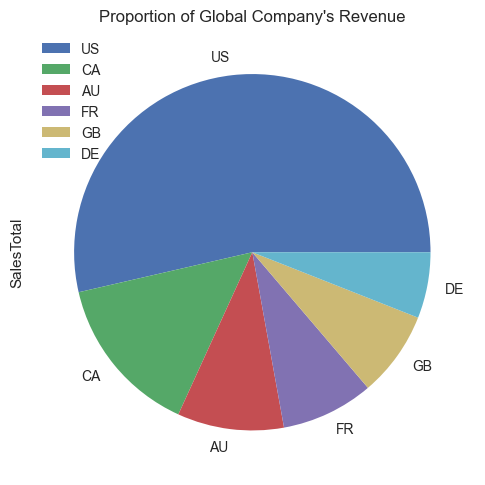

In [396]:
country_revenue.plot.pie(x='CountryRegionCode', y= 'SalesTotal')
plt.title("Proportion of Global Company's Revenue")
plt.style.use('seaborn')
plt.show()

##DONT USE

Now we will have the SQL code for revenue in the US regions.

In [397]:
query2 = '''SELECT st.Name,
	ROUND(SUM(st.SalesYTD + st.SalesLastYear), 0) AS SalesTotal
FROM Sales.SalesTerritory as st
WHERE CountryRegionCode = 'US'
GROUP BY st.Name
ORDER BY SalesTotal DESC
;'''


Now we have the python code to use this sql query to create a bar chart to show best perfroming regions.

In [398]:
us_region_revenue = pd.read_sql(query2, conn)
print(us_region_revenue)

        Name  SalesTotal
0  Southwest  15877430.0
1  Northwest  11185881.0
2  Southeast   6463739.0
3    Central   6277189.0
4  Northeast   6009326.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\1401690109.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_region_revenue = pd.read_sql(query2, conn)


I will now use a bar graph with the data on this list, with the highest value bar on the left, to illustrate the levels of revenue for each region descending

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\4147178382.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


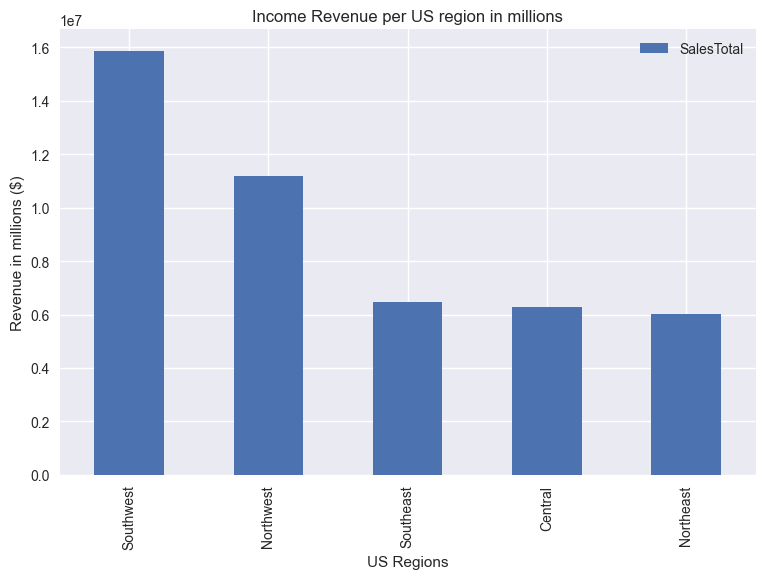

In [399]:
us_region_revenue.plot.bar(x='Name', y='SalesTotal')
plt.title('Income Revenue per US region in millions')
plt.ylabel('Revenue in millions ($)')
plt.xlabel('US Regions')
plt.style.use('seaborn')
plt.show()

##DONT USE

Now I will look to investigate why the Southwest US region has the largest revenuue of all US regions. For this, I will return to SQL to create a table, noting the reason for purchase. The code for this will be linked into python below

In [406]:
query3 = '''SELECT ST.Name AS Region,
	SR.Name AS Reason,
	COUNT(SOH.SalesOrderID) AS No_Orders

FROM Sales.SalesTerritory as ST

FULL OUTER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
FULL OUTER JOIN Sales.SalesOrderHeaderSalesReason AS SOHR
ON SOHR.SalesOrderID = SOH.SalesOrderID
FULL OUTER JOIN Sales.SalesReason AS SR
ON SR.SalesReasonID = SOHR.SalesReasonID

WHERE CountryRegionCode = 'US'

GROUP BY ST.Name, SR.Name
ORDER BY CASE WHEN ST.Name = 'Southwest' THEN '1'
			WHEN ST.Name = 'Northwest' THEN '2'
			WHEN ST.Name = 'Central' THEN '3'
			WHEN ST.Name = 'Southeast' THEN '4'
			WHEN ST.Name = 'Northeast' THEN '5'
			ELSE ST.Name END ASC
;'''

us_sales_reason = pd.read_sql(query3, conn)
print(us_sales_reason.head())

      Region                     Reason  No_Orders
0  Southwest               On Promotion        656
1  Southwest  Television  Advertisement        155
2  Southwest                      Other        292
3  Southwest                      Price       3582
4  Southwest                     Review        261


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\1064945922.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_sales_reason = pd.read_sql(query3, conn)


However, using this information to create a bar chart will be extremely cluttered. I am therefore going to create a new, much more structured table, in order to later create a more presentable Grouped Bar Graph.

In [407]:
print(us_sales_reason.pivot(index='Region', columns='Reason', values='No_Orders'))

Reason        NaN  Manufacturer  On Promotion  Other   Price  Quality  Review  \
Region                                                                          
Central     376.0           NaN           1.0    1.0     7.0      NaN     1.0   
Northeast   343.0           NaN           1.0    NaN     7.0      NaN     1.0   
Northwest  1094.0         238.0         430.0  211.0  2745.0    218.0   189.0   
Southeast   471.0           NaN           1.0    NaN    12.0      NaN     2.0   
Southwest  1555.0         409.0         656.0  292.0  3582.0    359.0   261.0   

Reason     Television  Advertisement  
Region                                
Central                          1.0  
Northeast                        NaN  
Northwest                      127.0  
Southeast                        1.0  
Southwest                      155.0  


Now lets use this for a Grouped Bar Graph!

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\978379406.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


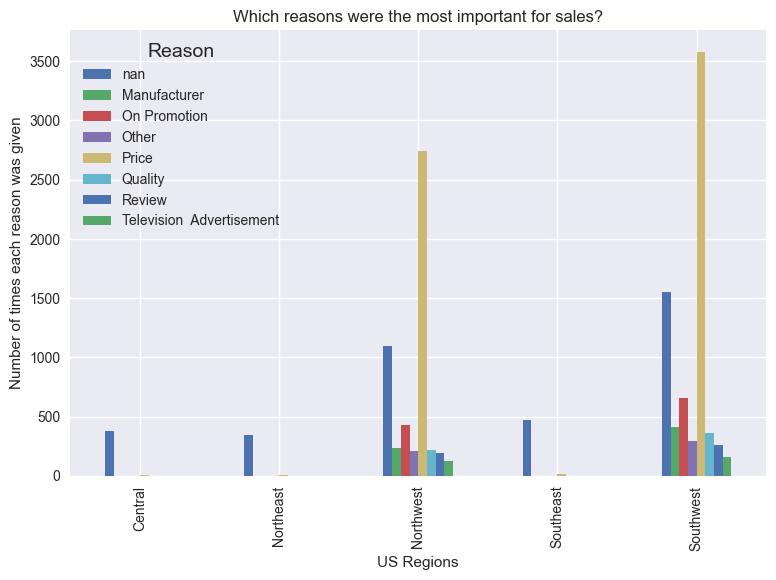

In [408]:
us_sales_reason.pivot(index='Region', columns='Reason', values='No_Orders').plot(kind='bar')
plt.xlabel('US Regions')
plt.ylabel('Number of times each reason was given')
plt.title('Which reasons were the most important for sales?')
plt.style.use('seaborn')
plt.show()

Thid doesn't really tell us much, other than there are few data inputs for 3/5 of the US regions. Lets filter and just look at the NW and SW regions. I am just going to copy the code above, and filter for when Region = Northwest and Southwest

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2355255550.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_sales_reason2 = pd.read_sql(query31, conn)


      Region        Reason  No_Orders
0  Southwest  Manufacturer        409
1  Northwest       Quality        218
2  Northwest          None       1094
3  Southwest          None       1555
4  Southwest         Price       3582
Reason      NaN  Manufacturer  On Promotion  Other  Price  Quality  Review  \
Region                                                                       
Northwest  1094           238           430    211   2745      218     189   
Southwest  1555           409           656    292   3582      359     261   

Reason     Television  Advertisement  
Region                                
Northwest                        127  
Southwest                        155  


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2355255550.py:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


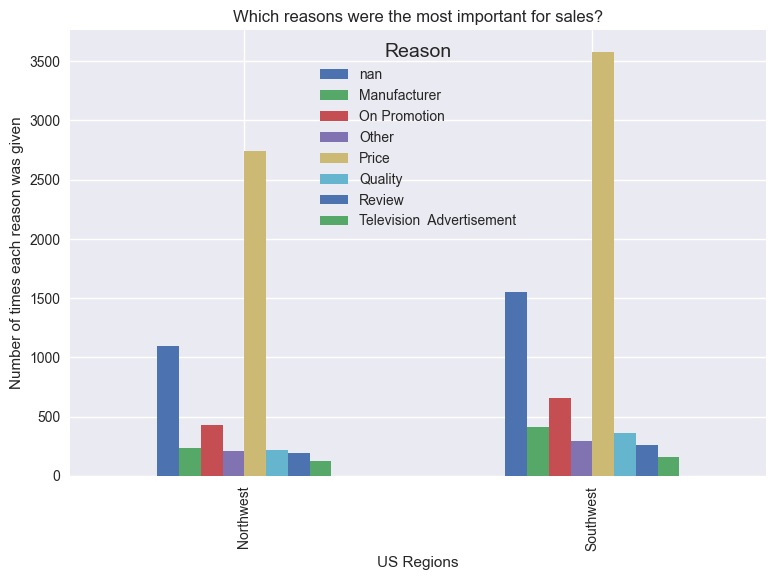

In [409]:
query31 = '''SELECT ST.Name AS Region,
	SR.Name AS Reason,
	COUNT(SOH.SalesOrderID) AS No_Orders

FROM Sales.SalesTerritory as ST

FULL OUTER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
FULL OUTER JOIN Sales.SalesOrderHeaderSalesReason AS SOHR
ON SOHR.SalesOrderID = SOH.SalesOrderID
FULL OUTER JOIN Sales.SalesReason AS SR
ON SR.SalesReasonID = SOHR.SalesReasonID

WHERE ST.Name IN ('Northwest', 'Southwest')

GROUP BY ST.Name, SR.Name
;
'''

us_sales_reason2 = pd.read_sql(query31, conn)
print(us_sales_reason2.head())

print(us_sales_reason2.pivot(index='Region', columns='Reason', values='No_Orders'))

us_sales_reason2.pivot(index='Region', columns='Reason', values='No_Orders').plot(kind='bar')
plt.xlabel('US Regions')
plt.ylabel('Number of times each reason was given')
plt.title('Which reasons were the most important for sales?')
plt.style.use('seaborn')
plt.show()

Hmm, that's quite messy still. It does show us that the most important reason by far is due to price, and then secondly promotions. The least important reasons were reviews, quality and television advertisements. This tells us that the company should focus on producing affordable, and relatively cheaper products, rather than high-end products. Furhtermore, their advertisements may need improving as they are not really a reason for sales.

Now I will look at the number of sales people per territory. I know some territories have 1, so for the sake of graphical cohesion, I will alter my sql query to include a case when, to ensure a regular structure for when i move between slides in my explanataions

In [410]:
query4 = '''SELECT SP.TerritoryName,
	COUNT(SP.BusinessEntityID) AS SalesPeople
FROM Sales.vSalesPerson AS SP
WHERE SP.TerritoryName IN ('Northeast', 'Southeast', 'Southwest', 'Northwest', 'Central')
GROUP BY SP.TerritoryName
ORDER BY CASE WHEN SP.TerritoryName = 'Southwest' THEN '1'
			WHEN SP.TerritoryName = 'Northwest' THEN '2'
			WHEN SP.TerritoryName = 'Central' THEN '3'
			WHEN SP.TerritoryName = 'Southeast' THEN '4'
			WHEN SP.TerritoryName = 'Northeast' THEN '5'
			ELSE SP.TerritoryName END ASC
;'''

us_sales_people = pd.read_sql(query4, conn)
print(us_sales_people)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2436922709.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_sales_people = pd.read_sql(query4, conn)


  TerritoryName  SalesPeople
0     Southwest            2
1     Northwest            3
2       Central            1
3     Southeast            1
4     Northeast            1


With the list of Sales persons per territory, we can compare it

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\416263279.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


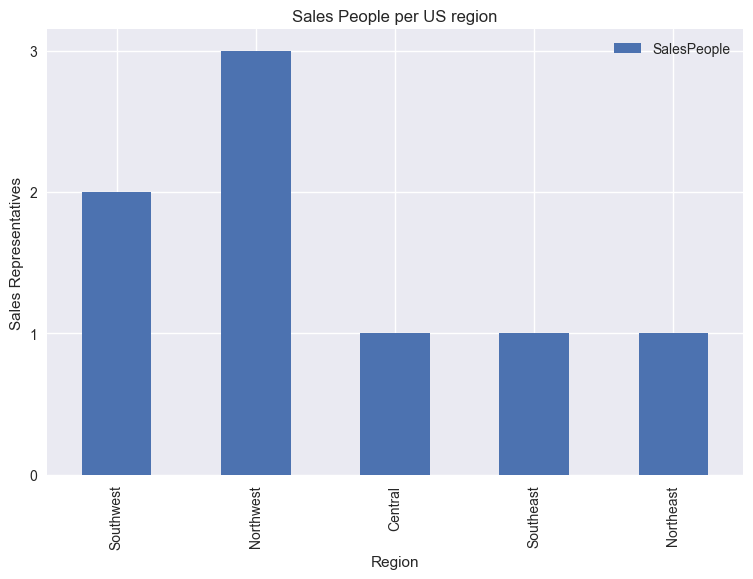

In [411]:
us_sales_people.plot.bar(x='TerritoryName', y='SalesPeople')
plt.title('Sales People per US region')
plt.ylabel('Sales Representatives')
plt.xlabel('Region')
plt.yticks([0, 1, 2, 3], ['0', '1', '2', '3'])
plt.style.use('seaborn')
plt.show()

This does show us there are a greater number of sales people for these areas, however the sales teams are relatively small. Lets see the sales per sales people in each region

In [438]:
query5= '''SELECT SP.TerritoryName,
	SUM(SP.SalesYTD + SP.SalesLastYear)/COUNT(SP.BusinessEntityID) AS SalesPerSalesPerson
FROM Sales.vSalesPerson AS SP
WHERE SP.TerritoryName IN ('Northeast', 'Southeast', 'Southwest', 'Northwest', 'Central')
GROUP BY SP.TerritoryName
ORDER BY CASE WHEN SP.TerritoryName = 'Southwest' THEN '1'
			WHEN SP.TerritoryName = 'Northwest' THEN '2'
			WHEN SP.TerritoryName = 'Central' THEN '3'
			WHEN SP.TerritoryName = 'Southeast' THEN '4'
			WHEN SP.TerritoryName = 'Northeast' THEN '5'
			ELSE SP.TerritoryName END ASC

;'''

us_sales_per_salesperson = pd.read_sql(query5, conn)
print(us_sales_per_salesperson)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2701842828.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_sales_per_salesperson = pd.read_sql(query5, conn)


  TerritoryName  SalesPerSalesPerson
0     Southwest         5.111283e+06
1     Northwest         2.600282e+06
2       Central         5.186605e+06
3     Southeast         4.164827e+06
4     Northeast         5.513585e+06


Now...you guessed it! Another graph to visualise

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2906918464.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


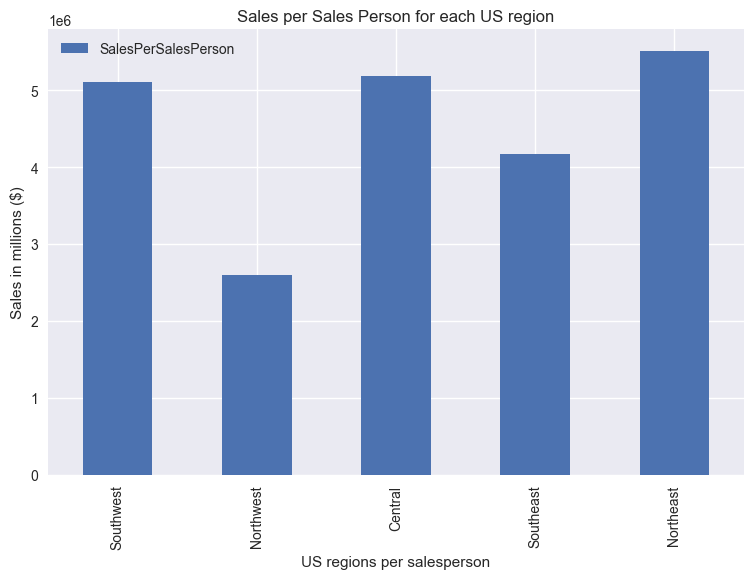

In [413]:
us_sales_per_salesperson.plot.bar(x='TerritoryName', y='SalesPerSalesPerson')
plt.title('Sales per Sales Person for each US region')
plt.ylabel('Sales in millions ($)')
plt.xlabel('US regions per salesperson')
plt.style.use('seaborn')
plt.show()

WOW! It seems that the worse performing sales territories are actually much more productive per sales person. Now lets see the territories the stores are in

In [414]:
query6='''SELECT ST.Name,
	SUM(SOD.OrderQTY * SOD.UnitPrice) AS Revenue
FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
WHERE CountryRegionCode = 'US'
GROUP BY ST.Name
ORDER BY Revenue DESC
;'''

sales_USregion = pd.read_sql(query6, conn)
print(sales_USregion)


        Name       Revenue
0  Southwest  2.431618e+07
1  Northwest  1.617293e+07
2    Central  7.935852e+06
3  Southeast  7.920557e+06
4  Northeast  6.963206e+06


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\634434656.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_USregion = pd.read_sql(query6, conn)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\3552771866.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


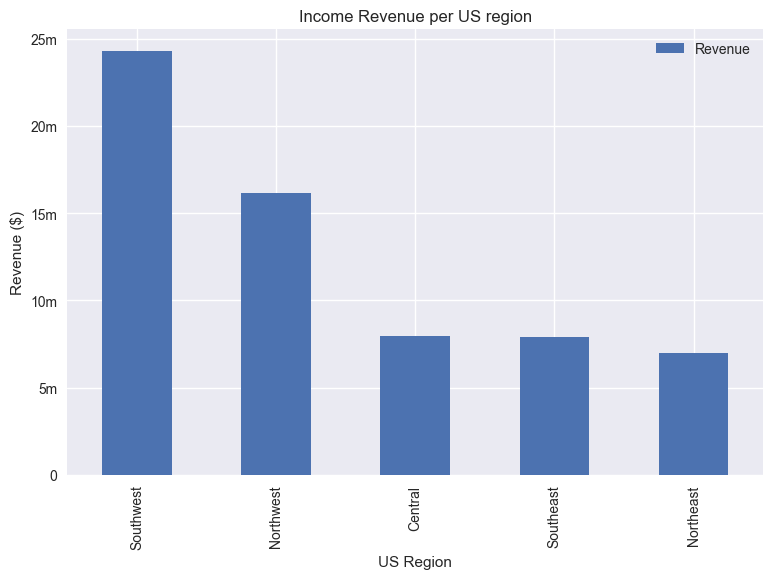

In [415]:
sales_USregion.plot.bar(x='Name', y='Revenue')
plt.title('Income Revenue per US region')
plt.ylabel('Revenue ($)')
plt.xlabel('US Region')
plt.yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000], ['0', '5m', '10m', '15m', '20m', '25m'])
plt.style.use('seaborn')
plt.show()

I began creating the above to discover which territory was ordering the most quantity. I decided to times quantity of orders by unit price to test and ensure my first bar graph was correct. As we can see there is a slight discrepency in the third and fourth bars being switched around. I shall discuss with my team whether we should use the first or the second graph. I believe this difference is either the result of null values, or additional year sales. As this code will be altered to measure order qty, I would choose to opt for this graph above, rather than the original. I will now alter the code to solely have order quantity

In [417]:
query7='''SELECT ST.Name,
	SUM(SOD.OrderQTY) AS OrderQuantity
FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
WHERE CountryRegionCode = 'US'
GROUP BY ST.Name
ORDER BY CASE WHEN ST.Name = 'Southwest' THEN '1'
			WHEN ST.Name = 'Northwest' THEN '2'
			WHEN ST.Name = 'Central' THEN '3'
			WHEN ST.Name = 'Southeast' THEN '4'
			WHEN ST.Name = 'Northeast' THEN '5'
			ELSE ST.Name END ASC
;'''

orderqty_USregion = pd.read_sql(query7, conn)
print(orderqty_USregion)

        Name  OrderQuantity
0  Southwest          59105
1  Northwest          36776
2    Central          19493
3  Southeast          18875
4  Northeast          19843


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2378083844.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderqty_USregion = pd.read_sql(query7, conn)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2755574971.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


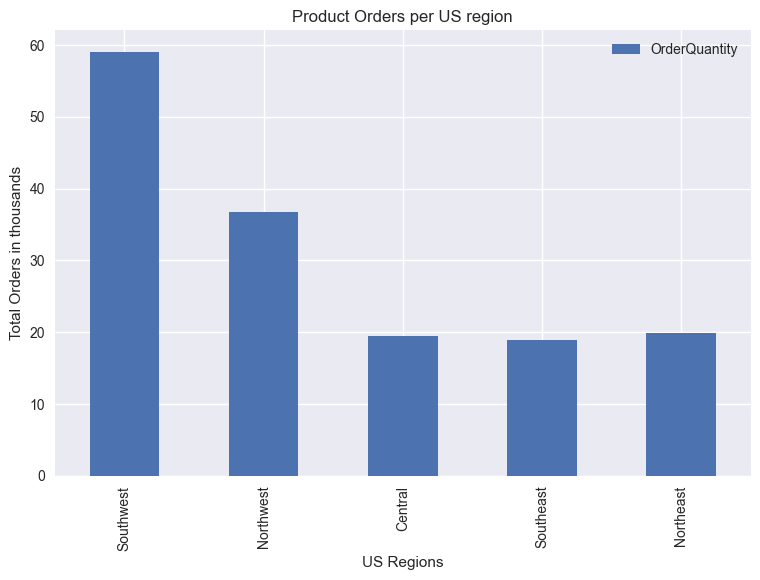

In [418]:
orderqty_USregion.plot.bar(x='Name', y='OrderQuantity')
plt.title('Product Orders per US region')
plt.ylabel('Total Orders in thousands')
plt.xlabel('US Regions')
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000], ['0', '10', '20', '30', '40', '50', '60'])
plt.style.use('seaborn')
plt.show()

As expected. The only surprise being northeast jumped up to third. This tells us that they order a lot of low value products from your company. I'm bored of the bar graphs now. Let's plot a scatter to show the correlation between revenue and order quantity.
I'll use the previous sql query and adjust to include both variables.

In [ ]:
query8= '''SELECT ST.Name,
	SUM(SOD.OrderQTY * SOD.UnitPrice) AS SaleValue,
    SUM(SOD.OrderQTY) AS OrderQuantity
FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
WHERE CountryRegionCode = 'US'
GROUP BY ST.Name
ORDER BY SaleValue DESC
;'''

scatter_orderqty_salesrevenue = pd.read_sql(query8, conn)
correlation= np.corrcoef(scatter_orderqty_salesrevenue['OrderQuantity'], scatter_orderqty_salesrevenue['SaleValue'])[0,1]
print(scatter_orderqty_salesrevenue)
svp= round(correlation, 4)
print(svp)

        Name     SaleValue  OrderQuantity
0  Southwest  2.431618e+07          59105
1  Northwest  1.617293e+07          36776
2    Central  7.935852e+06          19493
3  Southeast  7.920557e+06          18875
4  Northeast  6.963206e+06          19843
0.9949


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\3898376890.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scatter_orderqty_salesrevenue = pd.read_sql(query8, conn)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\3136421800.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


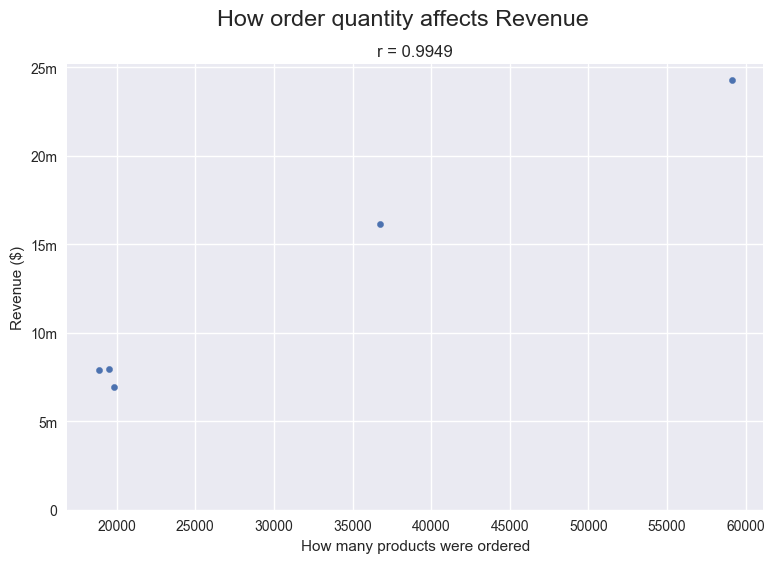

In [439]:
scatter_orderqty_salesrevenue.plot.scatter(x='OrderQuantity',y='SaleValue')
plt.suptitle('How order quantity affects Revenue')
plt.title('r = ' +str(svp))
plt.xlabel('How many products were ordered')
plt.ylabel('Revenue ($)')
plt.yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000], ['0', '5m', '10m', '15m', '20m', '25m'])
plt.style.use('seaborn')
plt.show()

Based off the issues I had with differences in my first bar graph, I have readjusted my code to create a new pie chart (given that they were similar code). This below and I will add to it to make it look a bit prettier.

                        Revenue
CountryRegionCode              
US                 6.330872e+07
CA                 1.644113e+07
AU                 1.068387e+07
GB                 7.702839e+06
FR                 7.291472e+06
DE                 4.945860e+06


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\1343822880.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  country_revenue2 = pd.read_sql(query9, conn, index_col='CountryRegionCode')
C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\1343822880.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


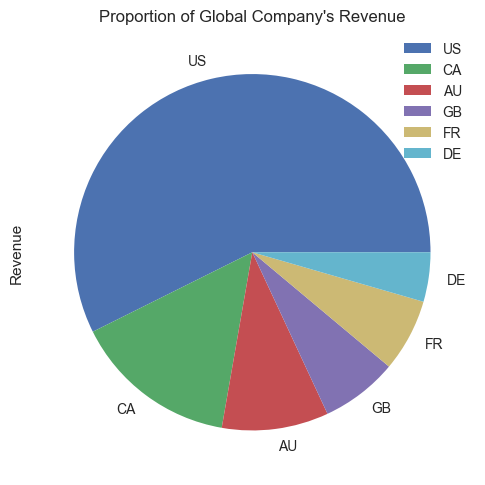

In [421]:
query9= '''SELECT ST.CountryRegionCode,
	SUM(SOD.OrderQTY * SOD.UnitPrice) AS Revenue
FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
Group BY CountryRegionCode
ORDER BY Revenue DESC
;
'''
country_revenue2 = pd.read_sql(query9, conn, index_col='CountryRegionCode')
print(country_revenue2)

#pie chart visualisation 
country_revenue2.plot.pie(x='CountryRegionCode', y= 'Revenue')
plt.title("Proportion of Global Company's Revenue")
plt.style.use('seaborn')
plt.show()

My slides have a lot of bar charts. Instead I will look to make a population pyramid to demonstrate the relationship between quant sold and revenue per US territory

In [445]:
query_poppyr= '''SELECT ST.Name,
	SUM(SOD.OrderQTY * SOD.UnitPrice) AS Revenue,
    SUM(SOD.OrderQTY) AS OrderQuantity
FROM Sales.SalesTerritory AS ST
INNER JOIN Sales.SalesOrderHeader AS SOH
ON SOH.TerritoryID = ST.TerritoryID
INNER JOIN Sales.SalesOrderDetail AS SOD
ON SOD.SalesOrderID = SOH.SalesOrderID
WHERE CountryRegionCode = 'US'
GROUP BY ST.Name
ORDER BY Revenue DESC
;'''

poppyr = pd.read_sql(query_poppyr, conn)
print(poppyr.head())

C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\3898376890.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scatter_orderqty_salesrevenue = pd.read_sql(query8, conn)


        Name       Revenue  OrderQuantity
0  Southwest  2.431618e+07          59105
1  Northwest  1.617293e+07          36776
2    Central  7.935852e+06          19493
3  Southeast  7.920557e+06          18875
4  Northeast  6.963206e+06          19843


C:\Users\Asus\AppData\Local\Temp\ipykernel_10688\2509362983.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  poppyr = pd.read_sql(query_poppyr, conn)


Now the data is checked and sorted, lets attempt to make a funky population pyramid. I will research this and backwards engineer from an online example, as this was not taught on DataCamp unfortunately :(

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

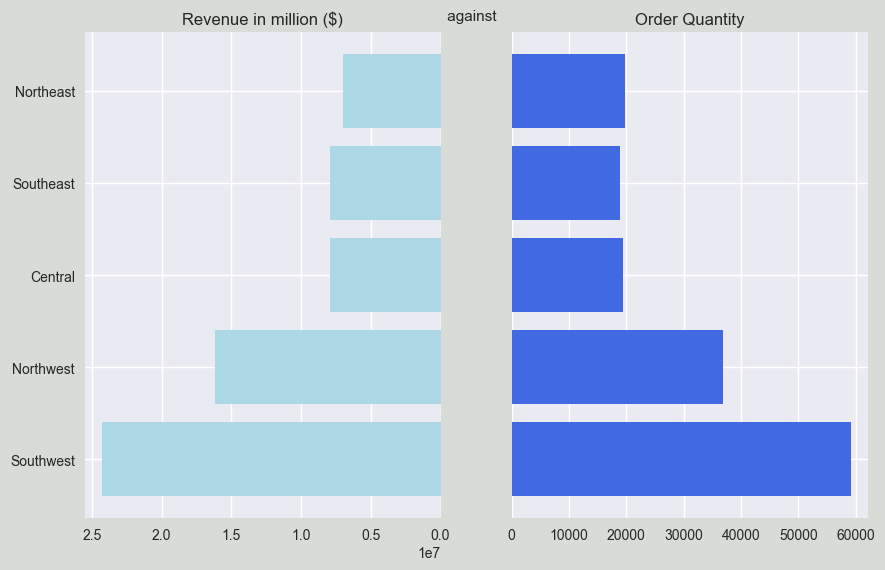

In [517]:
#define x and y limits
y = poppyr['Name']
x_rev = poppyr['Revenue']
x_qty = poppyr['OrderQuantity']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.51,.9," against ", fontsize=11, ha='center')
    
#define bars
axes[0].barh(y, x_rev, align='center', color='lightblue')
axes[0].set(title='Revenue in million ($)')
axes[1].barh(y, x_qty, align='center', color='royalblue')
axes[1].set(title='Order Quantity')

#adjust grid parameters and specify labels for y-axis
axes[0].invert_xaxis()
axes[0,1].grid()

#display plot
plt.show()


## Despite the help of my team, we were unable to figure out as to why my label changes for the x-axis on revenue were not occuring
## Below is the code I tried to use, of which I made a number of adjustments, including using .plt, xlabels=x, etc
## axes[0].set(xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000], ['0', '5m', '10m', '15m', '20m', '25m']))
## shamefully, given time restraints I decided to label on MS Paint as a quick fix 
## Once the project has been submitted, this is something I would like to revise

